**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import scipy.stats as stats


# import data 2C_weka.csv for 2 Class Classifcation.


In [3]:
class_2_dt = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [4]:
class_2_dt.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
class_2_dt.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [6]:
class_2_dt.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [7]:
# Converting datatype of class column into category

In [8]:
class_2_dt['class'] = class_2_dt['class'].astype('category')

In [9]:
class_2_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null category
dtypes: category(1), float64(6)
memory usage: 15.0 KB


In [10]:
class_2_dt.dtypes

pelvic_incidence             float64
pelvic_tilt numeric          float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
class                       category
dtype: object

In [11]:
class_2_dt.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


Plotting for all columns 

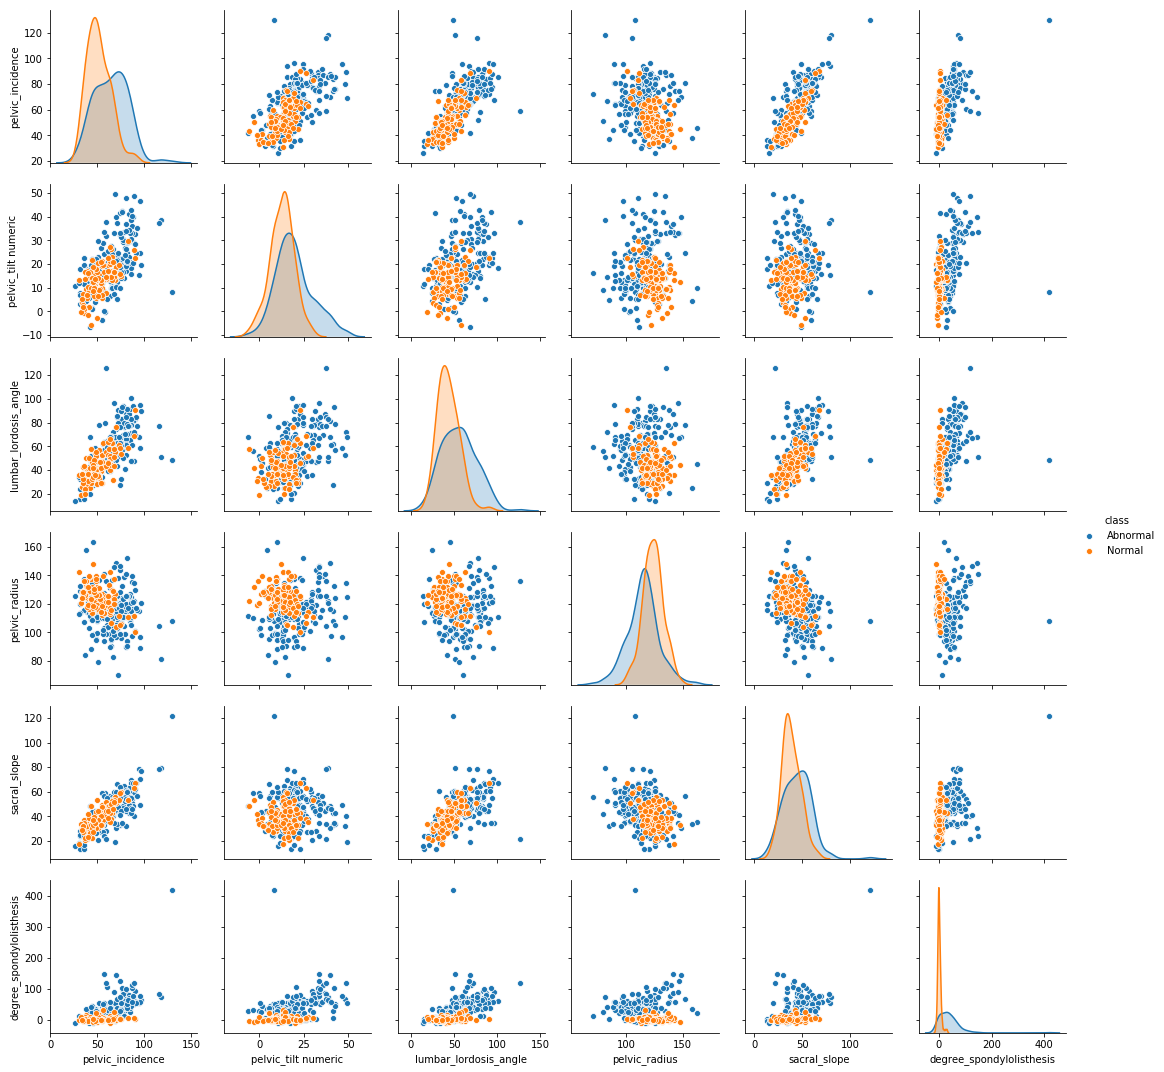

In [12]:
sns.pairplot(data=class_2_dt[["pelvic_incidence","pelvic_tilt numeric","lumbar_lordosis_angle","pelvic_radius","sacral_slope","degree_spondylolisthesis","class"]],
             hue="class")

In [13]:
class_2_dt.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [14]:
class_2_dt.var()

pelvic_incidence             297.097633
pelvic_tilt numeric          100.166675
lumbar_lordosis_angle        344.253290
sacral_slope                 180.179672
pelvic_radius                177.352531
degree_spondylolisthesis    1410.680476
dtype: float64

In [15]:
class_2_dt.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# Encode the Class variable to integer.

In [16]:
Y = class_2_dt['class']

In [17]:
Y = LabelEncoder().fit_transform(Y)

In [18]:
Y = Y.reshape(len(Y),1)

In [19]:
onehotencoder = OneHotEncoder(sparse=False)
Y = onehotencoder.fit_transform(Y)

C:\Users\Suhai\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [20]:
X = class_2_dt.drop(labels=['class', 'pelvic_tilt numeric'],axis=1)

In [21]:
Y = Y

# Normalize your Data (X) to get values between 0 to 1.

In [22]:
mn = MinMaxScaler()
X = pd.DataFrame(mn.fit_transform(X))

# Split the dat as train and test with a ratio of 70:30.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=3,stratify=Y)

Checking if the test and training data represent the process

Ho - The test and train both represents the process<br>
H1 - The test and train don't represent the process

In [24]:
t_statistic, p_value = stats.ttest_ind(X_train,X_test)
print(p_value.mean())

0.4619821535011856


Since p_value is greater than 5 we reject the alternate hypothesis and use the test and train data for the learning model

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [25]:
NNH = KNeighborsClassifier()

In [26]:
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [27]:
predicted_labels = NNH.predict(X_test)

In [28]:
print(f"For k = {5} gives an accuracy of {NNH.score(X_test,y_test)*100}%")

For k = 5 gives an accuracy of 81.72043010752688%


Splitting the data using train_test_split and  normalizing using minmaxscaler, k value of 5 gives an accuracy of 78.49%

# What is the best K value for your classifcation?
Find at which k value you get the best score.

In [29]:
maxK = int(np.sqrt(X_train.shape[0]))
optimalK = 3
optimalTrainAccuracy = 0
for k_i in range(maxK):
    if(((k_i % 2) != 0) & (k_i > 1)):
        NNH = KNeighborsClassifier(n_neighbors=k_i)
        NNH.fit(X_train, y_train)
        if(NNH.score(X_train, y_train) > optimalTrainAccuracy):
            optimalK = k_i
            optimalTrainAccuracy = NNH.score(X_train, y_train)
print(f"Optimum k is {optimalK} and the accuracy is {optimalTrainAccuracy*100}%")

Optimum k is 3 and the accuracy is 88.0184331797235%


Splitting the data using train_test_split and normalizing using minmaxscaler gives us a optimum value of k=3 and accuracy of 88.94%

Getting the actual accuracy using Cross fold validation (using 10 fold validation)


In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
NNH_cv = KNeighborsClassifier(n_neighbors=5)

In [32]:
cv_scores = cross_val_score(NNH_cv,X,Y,cv=10, scoring='accuracy')

In [33]:
print(cv_scores)
print(f"cv_score mean = {np.mean(cv_scores)}")

[0.51612903 0.48387097 0.74193548 0.87096774 0.93548387 0.93548387
 0.93548387 0.4516129  0.61290323 0.48387097]
cv_score mean = 0.6967741935483872


In [34]:
#Finding the best value for n_neighbours

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
NNH2 = KNeighborsClassifier()

In [37]:
param_grid = {'n_neighbors':np.arange(2,25)}

In [38]:
NNH_gscv = GridSearchCV(NNH2,param_grid, cv=10, scoring='accuracy')

In [39]:
NNH_gscv.fit(X,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
NNH_gscv.best_params_

{'n_neighbors': 3}

In [41]:
NNH_best_score = KNeighborsClassifier(n_neighbors=3)

In [42]:
cv_scores = cross_val_score(NNH_best_score,X,Y,cv=10)

In [43]:
print(cv_scores)
print(f"Optimum k value is {NNH_gscv.best_params_} and corresponding accuracy is = {np.mean(cv_scores)*100}%")

[0.5483871  0.51612903 0.77419355 0.83870968 0.90322581 0.93548387
 0.90322581 0.61290323 0.67741935 0.61290323]
Optimum k value is {'n_neighbors': 3} and corresponding accuracy is = 73.2258064516129%


Splitting the data using 10 cross_val and normalizing with maxminscaler and the Optimal K is 3 and the accuracy is 73.2%

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [44]:
class3_data = pd.read_csv("3Classdata.csv")

In [45]:
class3_data.shape

(310, 7)

In [46]:
#Data Exploration

In [47]:
class3_data.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [48]:
class3_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [49]:
class3_data.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [50]:
class3_data.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


In [51]:
#changing datatype to "Class" to category

In [52]:
class3_data['class'] = class3_data['class'].astype('category')

In [53]:
class3_data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [54]:
class3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null category
dtypes: category(1), float64(6)
memory usage: 15.0 KB


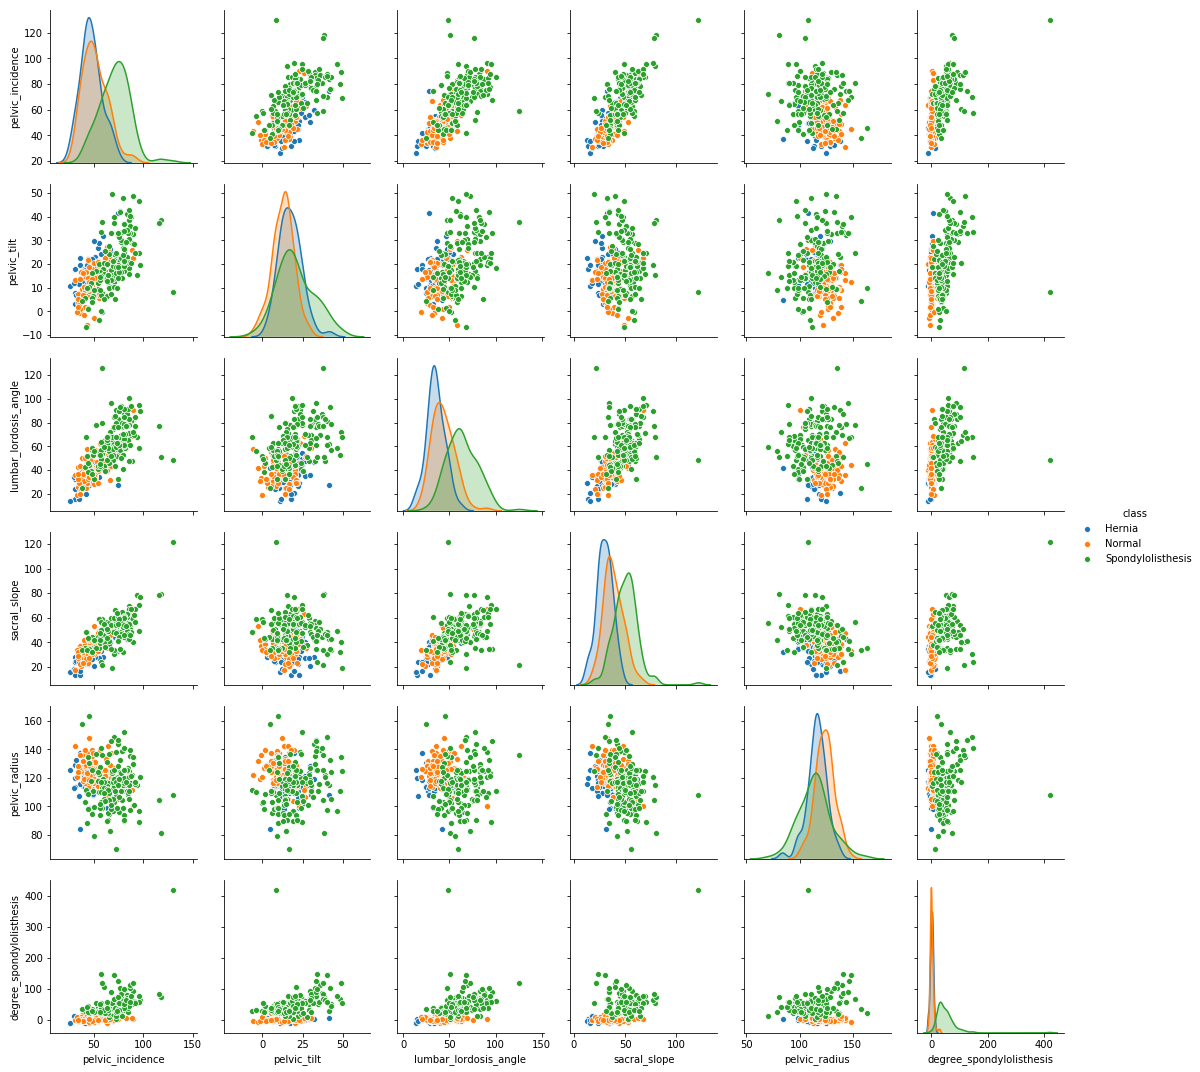

In [55]:
sns.pairplot(data=class3_data[["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis","class"]],
             hue="class")

In [56]:
class3_data.var()

pelvic_incidence             297.097633
pelvic_tilt                  100.166675
lumbar_lordosis_angle        344.253290
sacral_slope                 180.179672
pelvic_radius                177.352531
degree_spondylolisthesis    1410.680476
dtype: float64

In [57]:
Y = class3_data["class"]

In [58]:
Y = LabelEncoder().fit_transform(Y)

In [59]:
onehotencoder = OneHotEncoder(sparse=False)

In [60]:
Y = Y.reshape(len(Y),1)
Y= onehotencoder.fit_transform(Y)

C:\Users\Suhai\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Dropping pelvic tilt since there is less seperation between peaks

In [61]:
X = class3_data.drop(labels=['class','pelvic_tilt'], axis=1)

In [62]:
#using Z score to normalize data

In [63]:
X = X.apply(zscore)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=7,stratify=Y)

In [65]:
NNH = KNeighborsClassifier()

In [66]:
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
print(f"For k value = 5, the accuracy score is {NNH.score(X_test,y_test)*100}%")

For k value = 5, the accuracy score is 80.64516129032258%


Splitting the data using train_test_split and normalizing data using zscore and with k value of 5 gives an accuracy of 80.6%

In [68]:
maxK = int(np.sqrt(X_train.shape[0]))
optimalK = 3
optimalTrainAccuracy = 0
for k_i in range(maxK):
    if(((k_i % 2) != 0) & (k_i > 1)):
        NNH = KNeighborsClassifier(n_neighbors=k_i)
        NNH.fit(X_train, y_train)
        if(NNH.score(X_train, y_train) > optimalTrainAccuracy):
            optimalK = k_i
            optimalTrainAccuracy = NNH.score(X_train, y_train)
print(f"The optimum value of k is {optimalK} and the corresponding accuracy is {optimalTrainAccuracy*100}%")

The optimum value of k is 3 and the corresponding accuracy is 91.24423963133641%


Splitting the data using train_test_split and normalizing with zscore and the Optimal K is 3 and the accuracy is 91.2%

Improving accuracy using 10 cross fold

In [69]:
NNH_cv = KNeighborsClassifier(n_neighbors=5)

In [70]:
cv_scores = abs(cross_val_score(NNH_cv,X,Y,cv=10, scoring='accuracy'))

In [71]:
print(cv_scores)
print(f"cv_score mean = {np.mean(cv_scores)}")

[0.29032258 0.38709677 0.74193548 0.90322581 0.96774194 0.90322581
 0.96774194 0.58064516 0.77419355 0.64516129]
cv_score mean = 0.7161290322580646


In [72]:
param_grid = {'n_neighbors':np.arange(2,25)}

In [73]:
NNH2 = KNeighborsClassifier()

In [74]:
NNH_gscv = GridSearchCV(NNH2,param_grid, cv=10)

In [75]:
NNH_gscv.fit(X,Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
NNH_gscv.best_params_

{'n_neighbors': 5}

In [77]:
NNH_best_score = KNeighborsClassifier(n_neighbors=5)

In [78]:
cv_scores = cross_val_score(NNH_best_score,X,Y,cv=10)

In [79]:
print(cv_scores)
print(f"The optimum k value is {NNH_gscv.best_params_} and the corresponding accuracy is {np.mean(cv_scores)*100}%")

[0.29032258 0.38709677 0.74193548 0.90322581 0.96774194 0.90322581
 0.96774194 0.58064516 0.77419355 0.64516129]
The optimum k value is {'n_neighbors': 5} and the corresponding accuracy is 71.61290322580646%


Splitting the data using 10 cross_val and normalizing with zscore and the Optimal K is 5 and the accuracy is 71.6%